# Lab4: NumPy2

**[실습 유의 사항]**

https://docs.google.com/spreadsheets/d/1LufpYknSbN7179sVPreZ-hDJ7vHaZ1l64XMZeivjySQ/edit?usp=sharing

공유한 파일에 실습 현황을 공유해 주세요. 수업 진행에 도움이 됩니다.

In [ ]:
import numpy as np

---

**문제1 Review**

- stack과 concatenation을 이용해서 새롭게 풀어보세요!

문제)

ndarray를 이용해서 다음 모양의 matrix를 만들어 보세요

예시)
```
>>> my_arr
array([[0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 3., 3.],
       [2., 2., 3., 3.]])
```

In [ ]:
#Solution 1: stack
part0 = np.zeros((2, 2))
part1 = np.ones((2, 2))
plate = np.hstack((part0, part1))
plate = np.vstack((plate, plate+2))

plate

#Solution 2: concatenation
part0 = np.zeros((2, 2))
part1 = np.ones((2, 2))
plate = np.concatenate((part0, part1), axis=1)
plate = np.concatenate((plate, plate+2))

plate

---

**문제2 Growing Matrix**

ndarray를 이용해서 다음 조건을 만족하는 함수를 만들어보세요

1. 이 함수는 정수 하나를 인자로 받아 2차원의 ndarray를 생성하여 돌려줍니다.
2. 함수가 받아오는 인자는 3 이상의 정수 입니다.
3. 함수는 받은 숫자 만큼 ndarray를 채웁니다.
4. 채우는 방식은 다음과 같습니다. n번 째는 n-1번까지 만들어진 array에 가로, 세로를 번갈아 가며 길이에 맞게 숫자 n을 추가합니다.

(여러가지 풀이를 고민하셔도 좋습니다!)

예시)

```
>>> growing_matrix(3)
[[0 1 3]
 [2 2 3]]
```
```
>>> growing_matrix(5)
[[0 1 3 5]
 [2 2 3 5]
 [4 4 4 5]]
```
```
>>> growing_matrix(7)
[[0 1 3 5 7]
 [2 2 3 5 7]
 [4 4 4 5 7]
 [6 6 6 6 7]]
```
```
>>> growing_matrix(10)
[[ 0  1  3  5  7  9]
 [ 2  2  3  5  7  9]
 [ 4  4  4  5  7  9]
 [ 6  6  6  6  7  9]
 [ 8  8  8  8  8  9]
 [10 10 10 10 10 10]]
```

In [ ]:
import numpy as np
#Solution 1: stack
def growing_matrix(num):
  result = np.array([[0,1], [2,2]])

  for i in range(3,num+1):
    if i % 2 == 0:
      new = np.full((1,i//2+1), i)
      result = np.vstack((result, new))
    else:
      new = np.full((i//2+1,1), i)
      result = np.hstack((result, new))

  return result

print(growing_matrix(3))
print(growing_matrix(5))
print(growing_matrix(7))
print(growing_matrix(10))

#Solution 2: concatenation
def growing_matrix(num):
  result = np.array([[0,1], [2,2]])

  for i in range(3,num+1):
    if i % 2 == 0:
      new = np.full((1,i//2+1), i)
      result = np.concatenate((result, new))
    else:
      new = np.full((i//2+1,1), i)
      result = np.concatenate((result, new), axis=1)

  return result

print(growing_matrix(3))
print(growing_matrix(5))
print(growing_matrix(7))
print(growing_matrix(10))

[[0 1 3]
 [2 2 3]]
[[0 1 3 5]
 [2 2 3 5]
 [4 4 4 5]]
[[0 1 3 5 7]
 [2 2 3 5 7]
 [4 4 4 5 7]
 [6 6 6 6 7]]
[[ 0  1  3  5  7  9]
 [ 2  2  3  5  7  9]
 [ 4  4  4  5  7  9]
 [ 6  6  6  6  7  9]
 [ 8  8  8  8  8  9]
 [10 10 10 10 10 10]]
[[0 1 3]
 [2 2 3]]
[[0 1 3 5]
 [2 2 3 5]
 [4 4 4 5]]
[[0 1 3 5 7]
 [2 2 3 5 7]
 [4 4 4 5 7]
 [6 6 6 6 7]]
[[ 0  1  3  5  7  9]
 [ 2  2  3  5  7  9]
 [ 4  4  4  5  7  9]
 [ 6  6  6  6  7  9]
 [ 8  8  8  8  8  9]
 [10 10 10 10 10 10]]


---

**문제3-1 Activation Function**

Relu 함수는 최근 가장 많이 사용되는 활성화 홤수 입니다.
이 함수는 다음과 같이 정의 됩니다.

$$
f(x) = max(0, x)
$$

즉, x 값이 0 보다 작으면, 함수 값이 0이 되고, 그렇지 않으면 x 값이 함수 값이 됩니다.


NumPy를 이용해서 Relu 함수를 만들어 보세요.



In [ ]:
def relu(x):
  return np.maximum(0, x)

---

**문제3-2 Activation Function**   
또 다른 활성화 함수인 Sigmoid 함수는 다음과 같습니다

$$
sigmoid(x)=\frac{1}{1+e^{-x}}
$$

Sigmoid 함수는 x 값을 0과 1 사이의 값으로 만들어줍니다.

NumPy를 이용해서 Sigmoid 함수를 만들어 보세요

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

---

**문제4 카드 게임**  
1부터 25까지 숫자가 그려져 있는 카드가 있습니다.

5명의 사람들에게 각각 5장 씩 카드를 나눠줍니다.

일정한 규칙을 통해서 점수를 계산하여 점수가 가장 큰 사람이 승리합니다.

점수 계산 방식은 다음과 같습니다.

- n번 째 사람의 점수는 n번 째 카드에서 나머지 카드의 합을 뺀 값

예시)
$$
1 : [8\;18\;14\;6\;3] \rightarrow +8 -18 -14 -6 -3 = -33 
$$
$$
2 : [9\;21\;25\;2\;7]  \rightarrow -9 +21 -25 -2 -7 = -22
$$
$$
3 : [1\;19\;23\;12\;16]  \rightarrow -1 -19 +23 -12 -16 = -25
$$
$$
4 : [24\;13\;4\;10\;22] \rightarrow -24 -13 -4 +10 +22 = -53
$$
$$
5 : [20\;5\;15\;17\;11] \rightarrow -20 -5 -15 -17 + 11 = -46
$$
$$
Winner : 2
$$

for/while 문을 사용하지 않고 numpy 함수와 matrix 연산을 이용해보세요.

In [ ]:
cards = np.arange(1, 26)
np.random.shuffle(cards)
cards = cards.reshape(5, 5)
mat = np.eye(5)*2 - np.ones((5, 5))

np.argmax(np.sum(cards*mat, axis = 1)) + 1

---

**문제5 이미지 처리**
   
Slide 의 설명을 보고 아래의 빈칸을 채워보세요

Text(0.5, 1.0, 'blue')

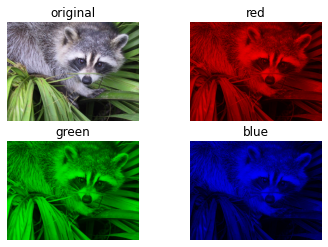

In [ ]:
from scipy import misc
import matplotlib.pylab as plt
import numpy as np

image = misc.face()

#------------------------------------
def make_color_image(image, color):

  new_image = image.copy()
  row = len(image)
  col = len(image[0])
  if color ==  'r':
    for i in range(row):
      for j in range(col):
        new_image[i, j,:] *= np.array([1, 0, 0], dtype=np.uint8)
  elif color == 'g':
    for i in range(row):
      for j in range(col):
        new_image[i, j,:] *= np.array([0, 1, 0], dtype=np.uint8)
  elif color == 'b':
    for i in range(row):
      for j in range(col):
        new_image[i, j,:] *= np.array([0, 0, 1], dtype=np.uint8)
  
  return new_image
#------------------------------------


plt.subplot(2,2,1)
plt.imshow(image)
plt.axis('off')
plt.title('original')

plt.subplot(2,2,2)
#------------------------------------
red_image = make_color_image(image, 'r')
plt.imshow(red_image)
#------------------------------------
plt.axis('off')
plt.title('red')

plt.subplot(2,2,3)
#------------------------------------
green_image = make_color_image(image, 'g')
plt.imshow(green_image)
#------------------------------------
plt.axis('off')
plt.title('green')

plt.subplot(2,2,4)
#------------------------------------
blue_image = make_color_image(image, 'b')
plt.imshow(blue_image)
#------------------------------------
plt.axis('off')
plt.title('blue')

---

**문제6-1 One hot encoding**

One hot encoding은 단 하나의 값만 True이고, 나머지는 모두 False로 encoding 하는 것 입니다.

One hot encoding을 활용하여 'data'를 다음과 같이 encoding 할 수 있습니다.
- alphabet와 연관된 index의 값만 True로 encoding 

$$
alphabet : index
$$
$$
a : 0
$$
$$
b : 1
$$
$$
c: 2
$$
$$
\ldots
$$
$$
z:25
$$

예시)
```
>>> 'data'
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
```


In [ ]:
one_hot_encoder = np.eye(26)

def encoder(text):
  return np.array([one_hot_encoder[ord(ch) - ord('a')] for ch in text])

---

**문제6-2 One hot encoding**

4-1 문제에서 encoding 한 결과를 다시 decoding 해보세요.

예시)

```
>>> [[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
     [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
'data'
```



In [ ]:
def decoder(arr):
  decoded = [chr(np.argmax(elem) + ord('a')) for elem in arr]
  return ''.join(decoded)

---

**문제7 두 벡터가 이루는 각**

벡터 a, b가 있을 때, 두 벡터가 이루는 각을 구해봅시다

두 벡터 사이에는 다음과 같은 관계식이 성립합니다.

$$
a⋅b = |a||b|cosθ
$$

이 식을 활용해서 각을 구해봅시다!

예시)

```
>>> a
array([3., -4., 5.])
>>> b
array([0., 0., 1.])
>>> degree(a, b)
45.0
```

hint:

- np.sqrt(), np.arccos(), np.pi를 이용하면 더욱 수월합니다.
- 위 관계식을 통해서 구해지는 θ 값은 radian 값이기 때문에 변환이 필요합니다.
- π = 180°



In [ ]:
a = np.array([3, -4, 5])
b = np.array([0, 0, 1])
#Solution1 : np.sum과 np.sqrt
def degree1(v1, v2):
  radian = np.arccos(np.dot(v1, v2) / (np.sqrt(np.sum(v1**2)) * np.sqrt(np.sum(v2**2))))
  return radian * 180 / np.pi
#Solution2 : np.linalg.norm
def degree2(v1, v2):
  radian = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
  return radian * 180 / np.pi
#Solution3: np.dot
def degree3(v1, v2):
  radian = np.arccos(np.dot(v1, v2) / (np.sqrt(v1.dot(v1)) * np.sqrt(v2.dot(v2))))
  return radian * 180 / np.pi

print(degree1(a ,b))
print(degree2(a ,b))
print(degree3(a ,b))

---

**문제8 기계학습의 성능 평가 지표**

기계학습에서 모델이나 패턴 분류 성능 평가에 사용되는 지표를 구현해봅시다.

- Accuracy
- Precision
- Recall
- F-measure

모든 함수는 2가지의 array가 주어집니다.

1. label은 모델이 맞춰야하는 정답입니다.
2. pred는 모델이 예측한 값을 의미합니다.

lable과 pred에서 1은 positive를 의미하고, 0은 negative를 의미합니다.

예시)

```
>>> label = np.array([1, 0, 1, 1, 0], dtype=int)
>>> pred = np.array([1, 1, 0, 0, 0], dtype=int)
```

이 정보를 통해서 data는 다음과 같이 분류가 될 수 있습니다.

|  | Negative(0) | Positive(1) |
|-|-|-|
| Negative(0) | True Negative | False Positive |
| Positive(1) | False Negative | True Positive |

위의 표에서 Row(가로축)은 정답(label)을 의미합니다.

그리고, Column(세로축)은 예측한 결과(pred)를 의미합니다.

즉, Negative(가로), Negative(세로)에 해당되는 'True Negative'는,

Negative로 판단해야 하는 data를 모델이 Negative로 맞춘 경우를 의미합니다.

마찬가지로, Positive(가로), Negative(세로)에 해당하는 'False Negative' 는,

Positive로 판단해야 하는 data를 모델이 Negative로 잘못 판단한 경우를 의미합니다.






---

**문제8-1 Accuracy**  

Accuracy는 다음과 같은 수식으로 구할 수 있습니다.

$$
Accuracy=\frac{True\;Nagative+True\;Positive}{Total}
$$

즉 전체 결과 중, 맞춘 결과가 얼만큼인지 비율을 계산하는 것 입니다.

Accuracy를 계산하는 함수를 만들어보세요.

예시)
```
>>> acc(label, pred)
0.4
```



In [ ]:
def acc(l, p):
  return np.mean(l == p)

---

**문제8-2 Precision**  

Precision은 다음과 같은 수식으로 구할 수 있습니다.

$$
Precision=\frac{True\;Positive}{Ture\;Positive+False\;Positive}
$$

$$
=\frac{True\;Positive}{Total\;Predicted\;Positive}
$$

즉 Positive 라고 예측한 모든 경우 중, 정답을 맞춘 비율을 계산하는 것 입니다.

Precision을 계산하는 함수를 만들어보세요.

예시)
```
>>> pred(label, pred)
0.5
```


In [ ]:
def prec(l, p):
  return np.sum(l*p) / p.sum()

---

**문제8-3 Recall**  

Recall은 다음과 같은 수식으로 구할 수 있습니다.

$$
Recall=\frac{True\;Positive}{Ture\;Positive+False\;Negative}
$$

$$
=\frac{True\;Positive}{Total\;Actual\;Positive}
$$

즉 Positive로 예측해야하는 모든 경우 중에서, 모델이 Positive로 예상하여 맞춘 비율을 계산하는 것 입니다.

Recall을 계산하는 함수를 만들어보세요.

예시)
```
>>> recall(label, pred)
0.333
```


In [ ]:
def recall(l, p):
  return np.sum(l*p)/ l.sum()

---

**문제8-3 F-measure**  

F-measure는 다음과 같은 수식으로 구할 수 있습니다.

$$
F-measure=\frac{2×precision×recall}{precision+recall}
$$

즉 앞서 계산한 precision과 recall의 조화 평균을 계산하는 것 입니다.

F-measure를 계산하는 함수를 만들어보세요.

예시)
```
>>> fmeasure(label, pred)
0.4
```


In [ ]:
def fmeasure(l, p):
  pre = prec(l, p)
  rec = recall(l, p)
  return 2*pre*rec/(pre+rec)

---

**문제9-1 영화 평점**  

다음의 조건을 만족하는 영화 평점을 데이터를 만들어 보세요

1. 관객 5명이 5가지 영화를 보고 매긴 평점을 랜덤으로 정합니다.
  - 영화의 평점은 0.5점부터 5점까지 0.5점 단위로 매길 수 있습니다.
2. 관객들은 4가지 영화만 봤습니다.
  - 각 관객이 준 평점에서 랜덤으로 1개를 정해 nan으로 합니다.
  - 각 관객이 보지 않은 영화는 서로 겹치지 않습니다.

|| 식스센스 | 타짜 | 트루먼쇼 | 인셉션 | 인터스텔라 |
|:-:|:-:|:-:|:-:|:-:|:-:|
|A|3.5|3.0|2.5|3.0|nan|
|B|2.5|1.0|nan|1.5|1.0|
|C|4.0|1.5|2.5|nan|3.0|
|D|3.0|nan|3.0|5.0|1.0|
|E|nan|0.5|4.0|2.5|5.0| 

예시)
```
>>> score
[[3.5, 3.0, 2.5, 3.0, np.nan]
 [2.5, 1.0, np.nan, 1.5, 1.0]
 [4.0, 1.5, 2.5, np.nan, 3.0]
 [3.0, np.nan, 3.0, 5.0, 1.0]
 [np.nan, 0.5, 4.0, 2.5, 5.0]]
```

In [ ]:
score = np.random.randint(1, 11, size=(5, 5)) / 2

not_watched = np.arange(5)
np.random.shuffle(not_watched)

for i in range(5):
  score[i][not_watched[i]] = np.nan

score

---

**문제9-2 관객 간의 취향 유사도**  

각 관객의 평점 데이터를 하나의 벡터라고 본다면,

두 관객 취향의 유사도는 각 관객 벡터들의 관계로 표현될 수 있습니다.

그리고 앞서서 보았듯이 두 벡터의 사이에는 다음의 관계식이 성립합니다.

$$
a⋅b = |a||b|cosθ
$$

$$
cosθ = \frac{a⋅b}{|a||b|}
$$

두 벡터 사이의 각이 작다는 것은 두 벡터가 유사하다고 판단할 수 있고, cosθ 값은 1에 가까울 것입니다.

이러한 계산 방법을 cosine similarity라고 하는데요,

각 관객들 사이의 유사도를 구해보세요

주의:
- nan 값을 어떻게 처리할지 결정해야합니다.
- nan 값은 계산시에 0으로 간주합니다.

예시)
$$
a = (3.5, 3.0, 2.5, 3.0, np.nan)
$$
$$
b = (2.5, 1.0, np.nan, 1.5, 1.0)
$$

$$
\frac{a⋅b}{|a||b|}=\frac{3.5×2.5 + 3.0×1.0 + 3.0×1.5}{\sqrt{3.5^2 + 3.0^2 + 2.5^2 + 3.0^2}\sqrt{2.5^2 + 1.0^2 + 1.5^2 + 1.0 ^ 2}} = 0.830
$$
```
[[1.0, 0.83, 0.71, 0.82, 0.46],
 [0.83, 1.0, 0.77, 0.74, 0.41],
 [0.71, 0.77, 1.0, 0.59, 0.65],
 [0.82, 0.74, 0.59, 1.0, 0.65],
 [0.46, 0.41, 0.65, 0.65, 1.0]]
```

In [ ]:
def cos_sim(v1, v2):
  inner = np.nansum(v1 * v2)
  v1_norm = np.sqrt(np.nansum(v1**2))
  v2_norm = np.sqrt(np.nansum(v2**2))
  return inner/(v1_norm*v2_norm)

result = np.array([cos_sim(score[i], score[j]) for i in range(5) for j in range(5)])
result.reshape(5, 5)
result

----

**문제9-3 개선된 취향 유사도**

각 관객이 매긴 평점의 편향(bias)를 제거하여 개선된 유사도를 구해봅시다.

- 각 관객이 매긴 평점의 평균을 각 평점에서 뺍니다.
- 기존의 평가되지 않은 항목은 적용하지 않습니다.

적용 전)

|| 식스센스 | 타짜 | 트루먼쇼 | 인셉션 | 인터스텔라 |
|:-:|:-:|:-:|:-:|:-:|:-:|
|A|3.5|3.0|2.5|3.0|nan|

적용 후)

|| 식스센스 | 타짜 | 트루먼쇼 | 인셉션 | 인터스텔라 |
|:-:|:-:|:-:|:-:|:-:|:-:|
|A|0.5|0.0|-0.5|0.0|nan|

변경된 데이터로 새로운 유사도를 계산해보고 이전 데이터와 비교해보세요.

In [ ]:
adj_score = np.array([elem - np.nanmean(elem) for elem in score])

result = np.array([cos_sim(adj_score[i], adj_score[j]) for i in range(5) for j in range(5)])
result.reshape(5, 5)

---

**문제10 Convolution Layer**

Slide 의 설명을 보고 코드를 작성해보세요

예시)

```
>>> x = np.array([[1,0,0,0], [1,1,1,1], [0,1,0,0], [1,1,0,1]])
>>> kernel = np.array([[1,0,0], [0,1,1], [1,1,1]])
>>> convolution2d(x,kernel)
array([[4., 3.], 
       [4., 3.]])
```

```
>>> x_ = np.array([[1,1,0,1,1], [0,1,0,0,1], [1,1,0,1,0], [0,0,1,1,1], [1,1,1,1,1]])
>>> kernel_ = np.array([[1,0,1], [1,1,1], [0,1,0]])
>>> convolution2d(x,kernel,stride=2)
array([[3. 3.]
       [3. 4.]])
```




In [ ]:
def conv2d(image, kernel, stride=1):
  x_len = int((image.shape[0] - kernel.shape[0])/stride) + 1
  y_len = int((image.shape[1] - kernel.shape[1])/stride) + 1
  result = np.zeros((x_len, y_len))

  for x in range(x_len):
    for y in range(y_len):
      frag = image[x*stride:x*stride+kernel.shape[0], y*stride:y*stride+kernel.shape[1]]
      result[x][y] = np.sum(kernel*frag)

  return result

x = np.array([[1,1,1,0,0],
              [0,1,1,1,0],
              [0,0,1,1,1],
              [0,0,1,1,0],
              [0,1,1,0,0]])

kern = np.array([[1,0,1],
                 [0,1,0],
                 [1,0,1]])

print(conv2d(x, kern))
print(conv2d(x, kern, 2))

---